# 1- Importation des librairies pour tester les différents modèles

In [ ]:
pip install lazypredict

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from xgboost import XGBClassifier
from sklearn.svm import NuSVC,SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import timeit, time 
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, chi2, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import PolynomialFeatures
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train_final.csv')

In [4]:
train.set_index('id', inplace = True)

In [5]:
train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
786,0.250000,0.517723,-0.5,0.0,-0.400000,1.0,0.0,2,3,1,...,0,1,0,0,1,0,0,1,0,0
874,0.500000,-0.025468,0.5,0.5,1.266667,1.0,0.0,0,4,2,...,1,0,0,0,1,0,0,1,0,0
66,-0.500000,-0.379740,0.5,-0.5,0.133333,1.0,0.0,0,2,1,...,0,1,0,0,1,0,0,1,0,0
903,0.500000,0.032310,0.5,-0.5,0.733333,1.0,1.0,0,2,3,...,0,1,0,0,1,0,0,1,0,0
318,1.500000,0.822959,-0.5,-0.5,-0.200000,1.0,0.0,2,2,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.500000,-0.451202,0.5,0.0,-0.266667,1.0,0.0,2,3,1,...,0,1,0,0,1,0,0,1,0,0
193,-0.666667,-0.385822,0.5,-0.5,-0.666667,0.0,0.0,3,1,1,...,0,1,0,0,1,0,0,1,0,0
630,-1.166667,-0.302575,-1.0,-0.5,-0.266667,0.0,1.0,3,1,0,...,0,1,0,0,1,0,0,0,0,1


# 2- Determination de la target value et split du dataset

In [6]:
y= train['class']
del train['class']
X = train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [8]:
X_train.shape

(720, 47)

In [9]:
y_train.shape

(720,)

In [10]:
X_test.shape

(180, 47)

In [11]:
y_test.shape

(180,)

In [12]:
y_train.value_counts()

1    503
0    217
Name: class, dtype: int64

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)

In [14]:
print(X_train_pca)

           0         1         2         3         4         5         6   \
id                                                                          
626 -0.661888 -1.406258 -0.303342 -0.400987  1.221422 -0.289209  0.421285   
551 -1.460380  0.033475  0.273316 -1.138120 -0.097835 -0.874790 -0.939408   
953  3.235173 -0.469225 -0.028679 -0.326383  2.445767  2.478378 -1.854601   
874  0.552764 -2.349977  0.036513  0.935651  0.599238 -0.404983  0.504368   
247  0.448573 -0.812952 -0.880333 -0.893923 -1.814526  1.318563 -0.136226   
..        ...       ...       ...       ...       ...       ...       ...   
937  2.425140 -1.167623 -0.614989  0.725586  0.314049 -0.325080  0.651575   
747 -0.263631  1.106602 -1.619699  0.305875 -0.303645 -1.512277  0.085460   
62   1.347672 -0.998447 -1.421861 -0.137390 -0.840518  0.998295 -0.376949   
196 -0.559514 -1.352219  1.902452 -1.560895  0.117228  2.156656 -0.611734   
526 -1.257103  1.767371  0.230748 -0.413076  1.525920 -0.952216  0.876345   

In [15]:
X_train_pca.shape

(720, 20)

# 3- Teste des diiférents algorithmes de façon native et visualisation des cas d'overfitting

Regression Logistique

Train Score Regression Logistique: 0.7625
Test Score Regression Logistique: 0.7166666666666667


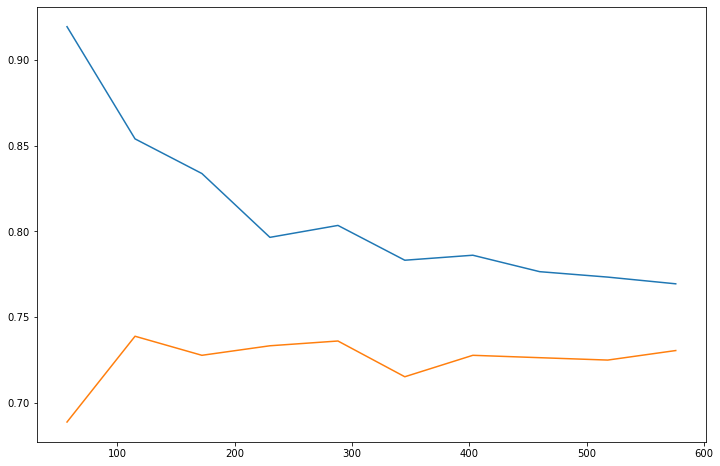

In [17]:
log = LogisticRegression()
log.fit(X_train, y_train)
print('Train Score Regression Logistique:', log.score(X_train, y_train))
print('Test Score Regression Logistique:', log.score(X_test, y_test))

N, train_score, val_score = learning_curve(log, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

KNN

Train Score KNN: 0.8041666666666667
Test ScoreKNN: 0.7055555555555556


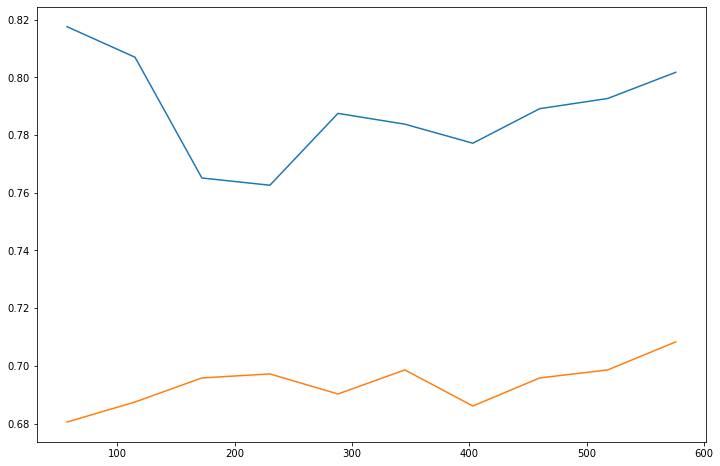

In [18]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print('Train Score KNN:', kn.score(X_train, y_train))
print('Test ScoreKNN:', kn.score(X_test, y_test))


N, train_score, val_score = learning_curve(kn, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Naive Bayes

Train Score Naive Bayes: 0.7416666666666667
Test Score Naive Bayes: 0.6888888888888889


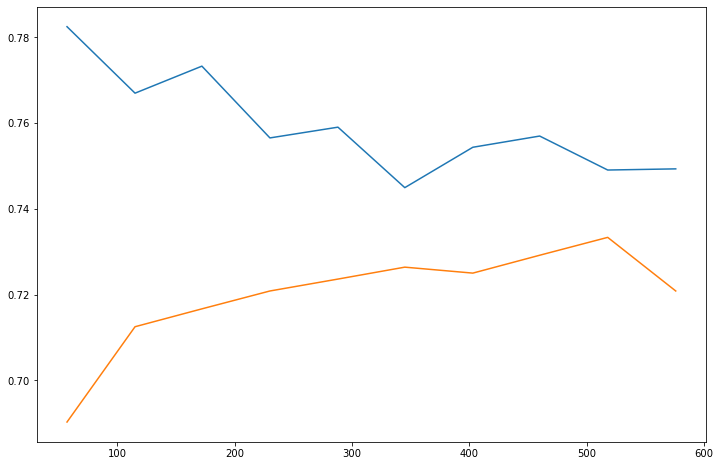

In [19]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
print('Train Score Naive Bayes:', nb.score(X_train, y_train))
print('Test Score Naive Bayes:', nb.score(X_test, y_test))


N, train_score, val_score = learning_curve(nb, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

SVC

Train Score SVC: 0.8236111111111111
Test Score SVC: 0.75


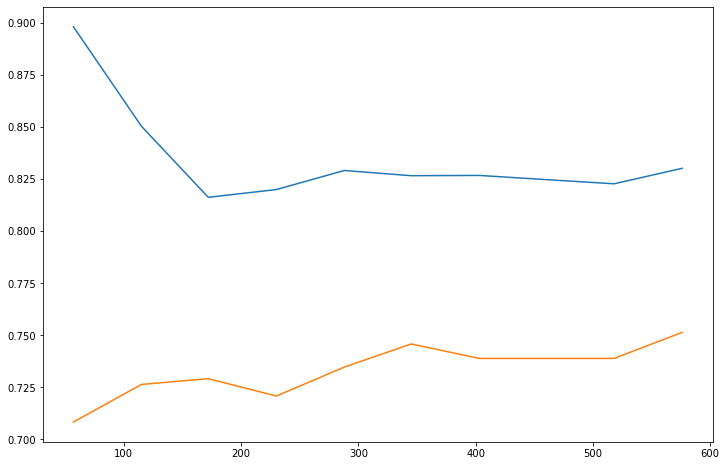

In [20]:
svc = SVC()
svc.fit(X_train, y_train)
print('Train Score SVC:', svc.score(X_train, y_train))
print('Test Score SVC:', svc.score(X_test, y_test))


N, train_score, val_score = learning_curve(svc, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Random Forest

Train Score random forest: 1.0
Test Score random forest: 0.7611111111111111


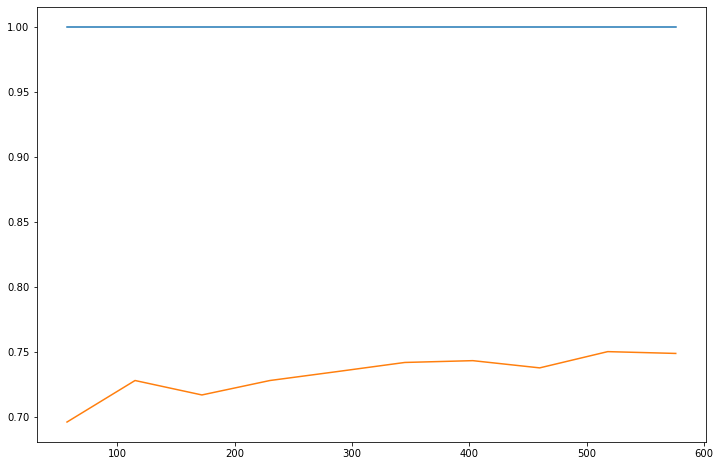

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Score random forest:', rf.score(X_train, y_train))
print('Test Score random forest:', rf.score(X_test, y_test))


N, train_score, val_score = learning_curve(rf, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# 4- Application du GridSearch pour trouver les hyperparamètres optimaux pour les modèles 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, recall_score,roc_auc_score, roc_curve


In [23]:
# Pour la RL

paramRL = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C' : [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02,2.03,2.04, 3.01],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}

gridRL = GridSearchCV(LogisticRegression(), paramRL, cv = 5)
gridRL.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 1, 1.01, 1.02, 2.01, 2.02,
                               2.03, 2.04, 3.01],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [24]:
gridRL.best_score_

0.7375

In [25]:
gridRL.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [26]:
start = timeit.default_timer()

modelRL = gridRL.best_estimator_
modelRL.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelRL.score(X_train, y_train))
print("test:",modelRL.score(X_test, y_test))

Le temps dexecution est de :0.0020065999997314066
train: 0.7583333333333333
test: 0.7166666666666667


0.7166666666666667
[[ 18  38]
 [ 13 111]]
              precision    recall  f1-score   support

           0       0.58      0.32      0.41        56
           1       0.74      0.90      0.81       124

    accuracy                           0.72       180
   macro avg       0.66      0.61      0.61       180
weighted avg       0.69      0.72      0.69       180



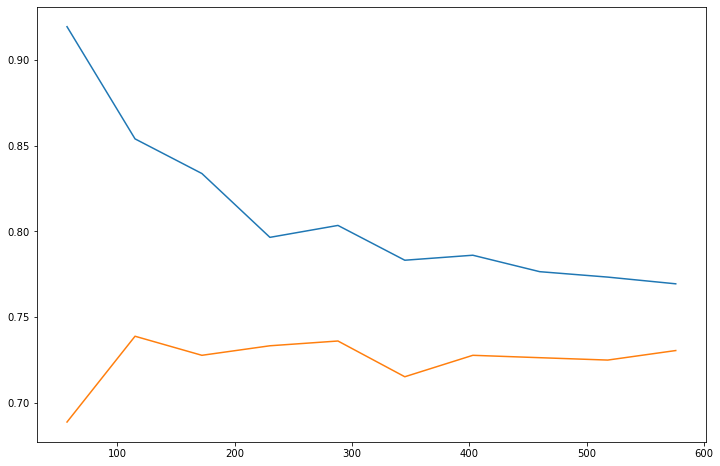

In [27]:
RL = LogisticRegression()
RL.fit(X_train, y_train)
y_pred_RL = RL.predict(X_test)
print(accuracy_score(y_pred_RL, y_test))
print(confusion_matrix(y_test, y_pred_RL))
print(classification_report(y_test, y_pred_RL))

N, train_score, val_score = learning_curve(RL, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# a- Pour le KNN

In [28]:
paramKNN = {'n_neighbors': np.arange(2, 34),
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'metric': ['euclidean','manhattan', 'minkowski']}
gridKNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5)
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
                         'weights': ['uniform', 'distance']})

In [29]:
gridKNN.best_score_

0.7333333333333334

In [30]:
gridKNN.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 16,
 'weights': 'uniform'}

In [31]:
start = timeit.default_timer()

modelKNN = gridKNN.best_estimator_
modelKNN.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelKNN.score(X_train, y_train))
print("test:", modelKNN.score(X_test, y_test))


Le temps dexecution est de :0.025817100002313964
train: 0.7791666666666667
test: 0.7


In [32]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  16,
 weights= 'uniform')

KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print(accuracy_score(y_pred_KNN, y_test))
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

0.7
[[ 17  39]
 [ 15 109]]
              precision    recall  f1-score   support

           0       0.53      0.30      0.39        56
           1       0.74      0.88      0.80       124

    accuracy                           0.70       180
   macro avg       0.63      0.59      0.59       180
weighted avg       0.67      0.70      0.67       180



In [33]:
#pd.DataFrame(KNN.feature_importances_, index = X_train.columns)

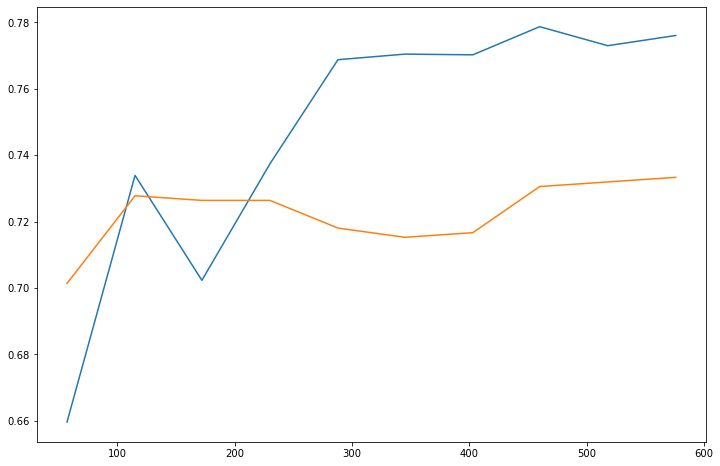

In [34]:
N, train_score, val_score = learning_curve(KNN, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# b- Pour Naive-Bayes

In [35]:
paramNB = {'alpha' : np.arange(1e-3, 13),
           
           }
gridNB = GridSearchCV(BernoulliNB(), paramNB, cv=5)
gridNB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01])})

In [36]:
gridNB.best_score_

0.7416666666666668

In [37]:
gridNB.best_params_

{'alpha': 10.000999999999998}

In [38]:
start = timeit.default_timer()

modelNB = gridNB.best_estimator_
modelNB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNB.score(X_train, y_train))
print("test:",modelNB.score(X_test, y_test))


Le temps dexecution est de :0.011732799997844268
train: 0.75
test: 0.6944444444444444


0.6888888888888889
[[ 24  32]
 [ 24 100]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        56
           1       0.76      0.81      0.78       124

    accuracy                           0.69       180
   macro avg       0.63      0.62      0.62       180
weighted avg       0.68      0.69      0.68       180



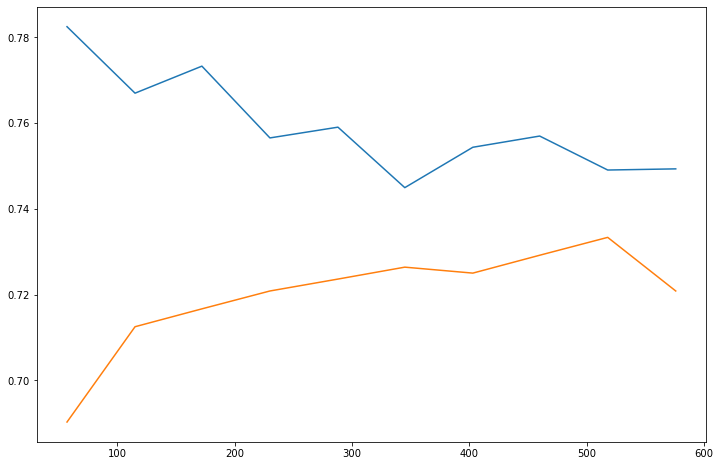

In [39]:
NB = BernoulliNB()

NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
print(accuracy_score(y_pred_NB, y_test))
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

N, train_score, val_score = learning_curve(NB, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## c- Pour SVC

In [40]:
from sklearn.svm import SVC
paramSVC = {'C' : np.arange(10, 23),
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridSVC = GridSearchCV(SVC(), paramSVC, cv=5)
gridSVC.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [41]:
gridSVC.best_score_

0.75

In [42]:
gridSVC.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [43]:
start = timeit.default_timer()

modelSVC = gridSVC.best_estimator_
modelSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelSVC.score(X_train, y_train))
print("test:", modelSVC.score(X_test, y_test))


Le temps dexecution est de :0.018889699997089338
train: 0.8777777777777778
test: 0.7388888888888889


0.7444444444444445
[[ 26  30]
 [ 16 108]]
              precision    recall  f1-score   support

           0       0.62      0.46      0.53        56
           1       0.78      0.87      0.82       124

    accuracy                           0.74       180
   macro avg       0.70      0.67      0.68       180
weighted avg       0.73      0.74      0.73       180



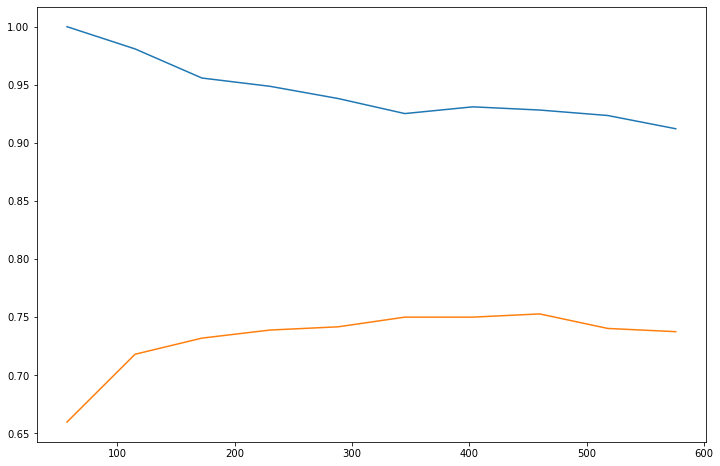

In [44]:
SVC = SVC(C= 16, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")

SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)
print(accuracy_score(y_pred_SVC, y_test))
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

N, train_score, val_score = learning_curve(SVC, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## d- Pour la foret aléatoire

In [45]:
from sklearn.ensemble import RandomForestClassifier

paramRF = {'n_estimators' : np.arange(37, 41),
           'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(11, 16),  
            'max_features': ['auto', 'sqrt', 'log2']
           }
gridRF = GridSearchCV(RandomForestClassifier(), paramRF, cv=5)
gridRF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([37, 38, 39, 40])})

In [46]:
gridRF.best_score_

0.7583333333333333

In [47]:
gridRF.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 37}

In [48]:
start = timeit.default_timer()

modelRF = gridRF.best_estimator_
modelRF.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelRF.score(X_test, y_test))


Le temps dexecution est de :0.007437600004777778
0.7555555555555555


In [49]:
RF = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k = 15),RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37))

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

0.75
[[ 25  31]
 [ 14 110]]
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        56
           1       0.78      0.89      0.83       124

    accuracy                           0.75       180
   macro avg       0.71      0.67      0.68       180
weighted avg       0.74      0.75      0.74       180



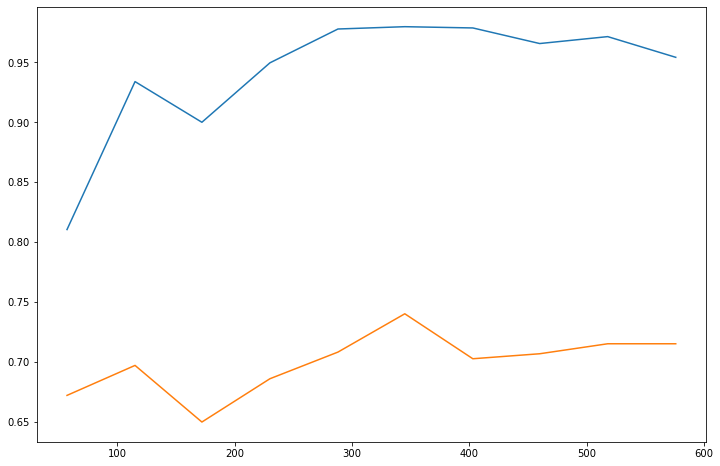

In [50]:
N, train_score, val_score = learning_curve(RF, X_train, y_train, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## e- Pour le Bagging Classifier

In [79]:
from sklearn.ensemble import BaggingClassifier

paramBG = {
    'n_estimators' : np.arange(7, 15),
    'max_samples' : np.arange(0.01, 5),
    'max_features' : np.arange(0.01, 5),
    'verbose' : np.arange(1, 5)
}

gridBG = GridSearchCV(BaggingClassifier(), paramBG, cv = 5)
gridBG.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us


Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 8 for this parallel run (total 8)...
Building estimator 7 of 8 for this parallel run (total 8)...
Building estimator 8 of 8 for this parallel run (total 8)...
Building estimator 1 of 8 for this parallel run (total 8)...
Building estimator 2 of 8 for this parallel run (total 8)...
Building estimator 3 of 8 for this parallel run (total 8)...
Building estimator 4 of 8 for this parallel run (total 8)...
Building estimator 5 of 8 for this parallel run (total 8)...
Building estimator 6 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (tot

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (total 11)...
Building estimator 9 of 11 for this parallel run (total 11)...
Building estimator 10 of 11 for this parallel run (total 11)...
Building estimator 11 of 11 for this parallel run (total 11)...
Building estimator 1 of 11 for this parallel run (total 11)...
Building estimator 2 of 11 for this parallel run (total 11)...
Building estimator 3 of 11 for this parallel run (total 11)...
Building estimator 4 of 11 for this parallel run (total 11)...
Building estimator 5 of 11 for this parallel run (total 11)...
Building estimator 6 of 11 for this parallel run (total 11)...
Building estimator 7 of 11 for this parallel run (total 11)...
Building estimator 8 of 11 for this parallel run (tot

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (total 12)...
Building estimator 11 of 12 for this parallel run (total 12)...
Building estimator 12 of 12 for this parallel run (total 12)...
Building estimator 1 of 12 for this parallel run (total 12)...
Building estimator 2 of 12 for this parallel run (total 12)...
Building estimator 3 of 12 for this parallel run (total 12)...
Building estimator 4 of 12 for this parallel run (total 12)...
Building estimator 5 of 12 for this parallel run (total 12)...
Building estimator 6 of 12 for this parallel run (total 12)...
Building estimator 7 of 12 for this parallel run (total 12)...
Building estimator 8 of 12 for this parallel run (total 12)...
Building estimator 9 of 12 for this parallel run (total 12)...
Building estimator 10 of 12 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_job

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (total 13)...
Building estimator 4 of 13 for this parallel run (total 13)...
Building estimator 5 of 13 for this parallel run (total 13)...
Building estimator 6 of 13 for this parallel run (total 13)...
Building estimator 7 of 13 for this parallel run (total 13)...
Building estimator 8 of 13 for this parallel run (total 13)...
Building estimator 9 of 13 for this parallel run (total 13)...
Building estimator 10 of 13 for this parallel run (total 13)...
Building estimator 11 of 13 for this parallel run (total 13)...
Building estimator 12 of 13 for this parallel run (total 13)...
Building estimator 13 of 13 for this parallel run (total 13)...
Building estimator 1 of 13 for this parallel run (total 13)...
Building estimator 2 of 13 for this parallel run (total 13)...
Building estimator 3 of 13 for this parallel run (t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Para

Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (total 14)...
Building estimator 7 of 14 for this parallel run (total 14)...
Building estimator 8 of 14 for this parallel run (total 14)...
Building estimator 9 of 14 for this parallel run (total 14)...
Building estimator 10 of 14 for this parallel run (total 14)...
Building estimator 11 of 14 for this parallel run (total 14)...
Building estimator 12 of 14 for this parallel run (total 14)...
Building estimator 13 of 14 for this parallel run (total 14)...
Building estimator 14 of 14 for this parallel run (total 14)...
Building estimator 1 of 14 for this parallel run (total 14)...
Building estimator 2 of 14 for this parallel run (total 14)...
Building estimator 3 of 14 for this parallel run (total 14)...
Building estimator 4 of 14 for this parallel run (total 14)...
Building estimator 5 of 14 for this parallel run (total 14)...
Building estimator 6 of 14 for this parallel run (

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'max_samples': array([0.01, 1.01, 2.01, 3.01, 4.01]),
                         'n_estimators': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                         'verbose': array([1, 2, 3, 4])})

In [80]:
gridBG.best_score_

0.7027777777777777

In [81]:
gridBG.best_params_

{'max_features': 0.01, 'max_samples': 0.01, 'n_estimators': 11, 'verbose': 2}

In [82]:
start = timeit.default_timer()

modelBG = gridBG.best_estimator_
modelBG.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelBG.score(X_train, y_train))
print("test:", modelBG.score(X_test, y_test))



Le temps dexecution est de :0.0072422999946866184
train: 0.6986111111111111
test: 0.6888888888888889


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [83]:
BG = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print(accuracy_score(y_pred_BG, y_test))
print(confusion_matrix(y_test, y_pred_BG))
print(classification_report(y_test, y_pred_BG))

0.7388888888888889
[[ 13  43]
 [  4 120]]
              precision    recall  f1-score   support

           0       0.76      0.23      0.36        56
           1       0.74      0.97      0.84       124

    accuracy                           0.74       180
   macro avg       0.75      0.60      0.60       180
weighted avg       0.75      0.74      0.69       180



# f- Pour NuSVC

In [51]:
from sklearn.svm import NuSVC
paramNuSVC = {
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridNuSVC = GridSearchCV(NuSVC(), paramNuSVC, cv=5)
gridNuSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [52]:
gridNuSVC.best_score_

0.7513888888888889

In [53]:
gridNuSVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [54]:
start = timeit.default_timer()

modelNuSVC = gridNuSVC.best_estimator_
modelNuSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNuSVC.score(X_train, y_train))
print("test:", modelNuSVC.score(X_test, y_test))


Le temps dexecution est de :0.04400280000118073
train: 0.8625
test: 0.7444444444444445


In [55]:
NuSVC = NuSVC(decision_function_shape ='ovo', gamma= 'scale', kernel= 'rbf')

NuSVC.fit(X_train, y_train)
y_pred_NuSVC = NuSVC.predict(X_test)
print(accuracy_score(y_pred_NuSVC, y_test))
print(confusion_matrix(y_test, y_pred_NuSVC))
print(classification_report(y_test, y_pred_NuSVC))

0.7611111111111111
[[ 26  30]
 [ 13 111]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        56
           1       0.79      0.90      0.84       124

    accuracy                           0.76       180
   macro avg       0.73      0.68      0.69       180
weighted avg       0.75      0.76      0.75       180



# g- Pour XGBClassifier

In [56]:
from xgboost import XGBClassifier

paramXGB = { 
    'booster': ['gbtree','gblinear'],
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2],
}
gridXGB = GridSearchCV(XGBClassifier(), paramXGB, cv=5)
gridXGB.fit(X_train, y_train)

[10:57:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:57:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:57:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:57:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [57]:
gridXGB.best_score_

0.7541666666666667

In [58]:
gridXGB.best_params_

{'booster': 'gbtree', 'eta': 0.04}

In [59]:
start = timeit.default_timer()

modelXGB = gridXGB.best_estimator_
modelXGB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelXGB.score(X_train, y_train))
print("test:", modelXGB.score(X_test, y_test))


Le temps dexecution est de :0.016134200006490573
train: 0.9430555555555555
test: 0.75


In [60]:
XGB = XGBClassifier(booster = "gbtree", eta= 0.04)

XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
print(accuracy_score(y_pred_XGB, y_test))
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

[10:57:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.75
[[ 26  30]
 [ 15 109]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.54        56
           1       0.78      0.88      0.83       124

    accuracy                           0.75       180
   macro avg       0.71      0.67      0.68       180
weighted avg       0.74      0.75      0.74       180



## h- Pour AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier

paramAda = { 
    'n_estimators': np.arange(85, 102),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': np.arange(1, 10)
}
gridAda = GridSearchCV(AdaBoostClassifier(), paramAda, cv=5, scoring="accuracy")
gridAda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101]),
                         'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [85]:
gridAda.best_score_

0.7430555555555556

In [86]:
gridAda.best_params_

{'algorithm': 'SAMME', 'n_estimators': 92, 'random_state': 1}

In [87]:
start = timeit.default_timer()

modelAda = gridAda.best_estimator_
modelAda.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelAda.score(X_train, y_train))
print("test:", modelAda.score(X_test, y_test))


Le temps dexecution est de :0.016509299995959736
train: 0.7833333333333333
test: 0.7555555555555555


In [88]:
Ada = AdaBoostClassifier()

Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print(accuracy_score(y_pred_Ada, y_test))
print(confusion_matrix(y_test, y_pred_Ada))
print(classification_report(y_test, y_pred_Ada))

0.7611111111111111
[[ 23  33]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.70      0.41      0.52        56
           1       0.78      0.92      0.84       124

    accuracy                           0.76       180
   macro avg       0.74      0.67      0.68       180
weighted avg       0.75      0.76      0.74       180



# 5- Comparatif des différents modèles et choix du meilleur modèle

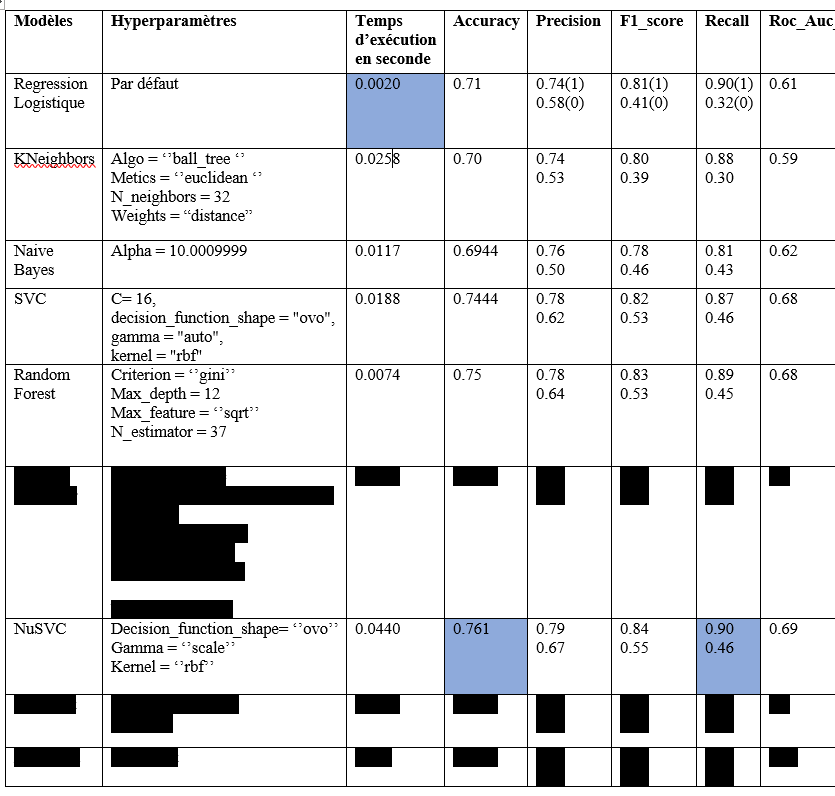

Après la visualisation de ce tableau comparatif, nous pouvons dire que le meilleur modèle est le leNuSVC car il a un meilleur accuracy score qui est de 0.761 avec un temps d'exécution qui est de 0.044 secondes

Le modèle le plus rapide est la regression Logistique avec un temps d'execution de 0.0020 secondes

# 6- Utilisation des méthodes d'ensemble

# a- Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier

In [72]:
model_1 = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance')

model_2 =  RandomForestClassifier()

model_3 = SVC(C = 15, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")
model_4 = VotingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          voting = 'hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

KNeighborsClassifier 0.7277777777777777
RandomForestClassifier 0.7555555555555555
SVC 0.7444444444444445
VotingClassifier 0.7722222222222223


# b- Bagging

In [78]:
model = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7333333333333333

# c- Stacking

In [62]:
#from sklearn.ensemble import StackingClassifier

model_4 = StackingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          final_estimator = RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37))

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [63]:
from tpot import TPOTClassifier

In [206]:
tpot = TPOTClassifier(generations = 15, verbosity = 2, population_size = 100, n_jobs = -1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7555555555555555

Generation 2 - Current best internal CV score: 0.7569444444444444

Generation 3 - Current best internal CV score: 0.7597222222222222

Generation 4 - Current best internal CV score: 0.7597222222222222

Generation 5 - Current best internal CV score: 0.7625

Generation 6 - Current best internal CV score: 0.7625

Generation 7 - Current best internal CV score: 0.7625000000000001

Generation 8 - Current best internal CV score: 0.763888888888889

Generation 9 - Current best internal CV score: 0.763888888888889

Generation 10 - Current best internal CV score: 0.763888888888889

Generation 11 - Current best internal CV score: 0.7680555555555555

Generation 12 - Current best internal CV score: 0.7680555555555555

Generation 13 - Current best internal CV score: 0.7680555555555555

Generation 14 - Current best internal CV score: 0.7680555555555555

Generation 15 - Current best internal CV score: 0.7680555555555555

Best pipeline: 

TPOTClassifier(generations=15, n_jobs=-1, verbosity=2)

In [207]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=6, max_features=0.1,
                                            min_samples_leaf=4,
                                            min_samples_split=12,
                                            subsample=0.9000000000000001))])

In [208]:
tpot.score(X_test, y_test)

0.7722222222222223

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
grad = GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 4, min_samples_split = 4,subsample = 0.9)

grad.fit(X_train, y_train)
y_pred_grad = KNN.predict(X_test)
print(accuracy_score(y_pred_grad, y_test))
print(confusion_matrix(y_test, y_pred_grad))
print(classification_report(y_test, y_pred_grad))

0.7
[[ 17  39]
 [ 15 109]]
              precision    recall  f1-score   support

           0       0.53      0.30      0.39        56
           1       0.74      0.88      0.80       124

    accuracy                           0.70       180
   macro avg       0.63      0.59      0.59       180
weighted avg       0.67      0.70      0.67       180

